In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Keras currently only runs in python 3.6!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# loading the training data

data = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Datasets\\digit-recognizer\\train.csv')

In [4]:
# the data consists of a horizontalized pixel display that is 28x28=784

data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# it contains 42k images

data.shape

(42000, 785)

In [26]:
# lets look at a example of the numbers

first = data.drop(columns='label').iloc[0].to_numpy() # 1
second = data.drop(columns='label').iloc[1].to_numpy() # 0
third = data.drop(columns='label').iloc[2].to_numpy() # 1
fourth = data.drop(columns='label').iloc[3].to_numpy() # 4
fifth = data.drop(columns='label').iloc[4].to_numpy() # 0

In [27]:
# we need to reshape the pixels into a grid format

first = first.reshape(28,28)
second = second.reshape(28,28)
third = third.reshape(28,28)
fourth = fourth.reshape(28,28)
fifth = fifth.reshape(28,28)

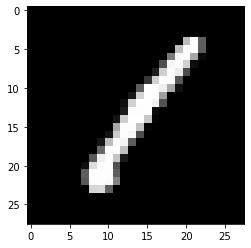

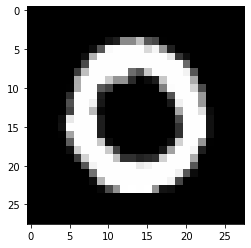

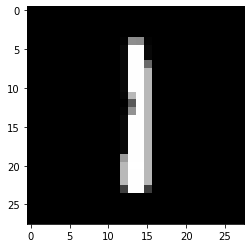

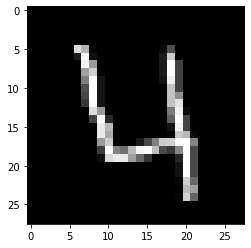

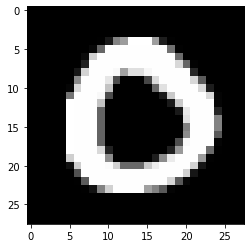

In [29]:
# matplotlib helps us plot this grid
# this are the first 5 numbers

plt.imshow(first, cmap = 'gray')
plt.show()
plt.imshow(second, cmap = 'gray')
plt.show()
plt.imshow(third, cmap = 'gray')
plt.show()
plt.imshow(fourth, cmap = 'gray')
plt.show()
plt.imshow(fifth, cmap = 'gray')
plt.show()

In [30]:
# for purpose of better backpropagation, i will normalize the data by dividing it by 255.

x_train = (data.drop(columns='label') / 255)
x_original = data
y = data['label']

In [32]:
normalized_data = pd.concat([y,x_train],axis=1)
normalized_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# now we split the data into a test dataset and a train dataset
# it will have the default values 25% for test.

X_train, X_test, y_train, y_test = train_test_split(x_train, y)

In [36]:
# Build the model.


model = Sequential([ # as far as we know, all networks are sequential
  Dense(64, activation='relu', input_shape=(784,)), # 784= 28*28 dense networks means all neurons in one layer are connected to all neuronsof the next layer
  Dense(64, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='softmax'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blam to play the blame game
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=5, # go 5 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)

# Evaluate the model.
model.evaluate(
  X_test,
  to_categorical(y_test)
)

Epoch 1/5
985/985 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8930
Epoch 2/5
985/985 [==============================] - 2s 2ms/step - loss: 0.1668 - accuracy: 0.9498
Epoch 3/5
985/985 [==============================] - 2s 2ms/step - loss: 0.1194 - accuracy: 0.9636
Epoch 4/5
985/985 [==============================] - 1s 1ms/step - loss: 0.0943 - accuracy: 0.9713
Epoch 5/5
329/329 [==============================] - 1s 1ms/step - loss: 0.1150 - accuracy: 0.9649


[0.11496364325284958, 0.9648571610450745]

In [37]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

[7 4 0 2 5]


In [47]:
# the actual targets
# we missed one, the 4 was actually a 9.

y_test.iloc[:5]

38777    7
16225    9
23567    0
26403    2
35514    5
Name: label, dtype: int64

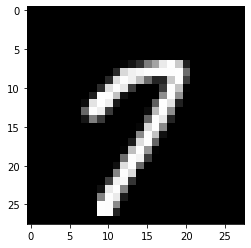

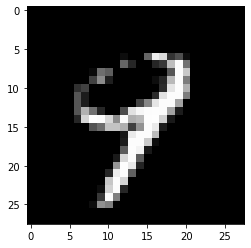

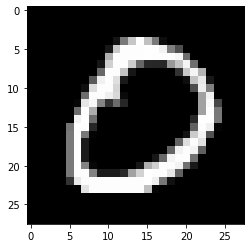

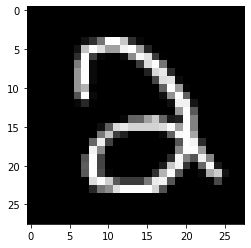

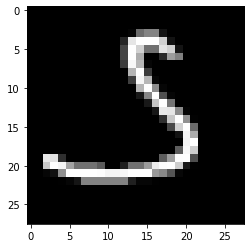

In [46]:
for i in range(5):
    plt.imshow(X_test.iloc[i].to_numpy().reshape(28,28), cmap = 'gray')
    plt.show()

In [48]:
# now we can predict the test

predict = pd.read_csv('C:\\Users\\DELL\\Kaggle\\Datasets\\digit-recognizer\\test.csv')

In [51]:
# it has 28k records to predict

predict.shape

(28000, 784)

In [54]:
# basically applying the same model.

predictions = model.predict(predict)

In [56]:
print(np.argmax(predictions[:5], axis=1)) 

[2 0 9 9 3]


In [67]:
list(np.argmax(predictions[:5], axis=1))

[2, 0, 9, 9, 3]

In [68]:
submission = predict.reset_index()
submission['Label'] = list(np.argmax(predictions, axis=1))
submission = submission[['index','Label']]

In [71]:
submission['ImageId'] = submission['index'] + 1
submission.head()

,index,Label,ImageId
0,0,2,1
1,1,0,2
2,2,9,3
3,3,9,4
4,4,3,5


In [72]:
submission.to_csv('submission.csv')